In [1]:
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#GPT

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# 1. Load the Data
df = pd.read_pickle("data_file/master_df_final.pkl")

2024-08-26 15:37:08.365874: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-26 15:37:08.370263: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-26 15:37:08.458678: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-26 15:37:08.460621: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-26 15:37:09.958410: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [4]:
# 2. Extract the Flux Data (columns 0 to 1169)
flux_data = df.iloc[:, 0:1170].values
# 3. Normalize the Flux Data
scaler = MinMaxScaler()
scaler2 = StandardScaler()
flux_normalized = scaler2.fit_transform(flux_data)

In [5]:
X_train, X_test = train_test_split(flux_normalized, test_size=0.2, random_state=42)

In [6]:
len(flux_normalized)

6676

In [7]:
len(X_train)

5340

In [8]:
len(X_test)

1336

In [9]:
flux_data

array([[0.83745578, 0.82362138, 0.82743567, ..., 0.91539133, 0.91740521,
        0.91816886],
       [0.82084379, 0.83021425, 0.83674765, ..., 0.91425329, 0.91948164,
        0.91585855],
       [0.81909811, 0.82720353, 0.8271968 , ..., 0.9234671 , 0.91496267,
        0.92070472],
       ...,
       [0.81692868, 0.80647938, 0.81682694, ..., 0.94348655, 0.94034783,
        0.94423066],
       [0.80770165, 0.79862428, 0.81367419, ..., 0.93598916, 0.93955261,
        0.93556555],
       [0.79466397, 0.80957972, 0.80300701, ..., 0.94303983, 0.95129259,
        0.94847836]])

In [10]:
flux_normalized

array([[ 2.29334451,  1.47106899,  1.7730963 , ..., -2.23066503,
        -2.11498675, -2.11642165],
       [ 1.08154665,  2.01166203,  2.53174541, ..., -2.33540301,
        -1.92006073, -2.32916702],
       [ 0.95420489,  1.76479316,  1.75363504, ..., -1.48741652,
        -2.34428175, -1.88290707],
       ...,
       [ 0.7959511 ,  0.06548309,  0.90879989, ...,  0.35506052,
         0.03876764,  0.28347792],
       [ 0.12286486, -0.57860877,  0.65194464, ..., -0.33495684,
        -0.03588468, -0.51444803],
       [-0.82819708,  0.31970013, -0.21711389, ...,  0.31394722,
         1.06621483,  0.67462774]])

In [11]:
flux_normalized.shape[1]

1170

In [12]:
# 4. Define the Autoencoder
input_dim = flux_normalized.shape[1]
input_layer = Input(shape=(input_dim,))

In [34]:
# Encoder
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

#Dense: A fully connected neural network layer. The numbers (128, 64, 32) represent the number of neurons in each layer.
#activation='relu': Uses the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity.

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded) # Here the activation function was sigmoid

#The decoder mirrors the encoder but in reverse.
#activation='sigmoid': The final layer uses the sigmoid function to ensure the output values are between 0 and 1,
#matching the normalized input data.

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse') #Mean Squared Error

# 5. Train the Autoencoder
history = autoencoder.fit(X_train, X_train, 
                epochs=100, 
                batch_size=64, 
                shuffle=True, 
                validation_data = [X_test, X_test],
                validation_split=0.2)

#fit: Trains the model.

#    flux_normalized: Both the input and target are the same since it's an autoencoder.
#    epochs=50: The model will iterate over the entire dataset 50 times.
#    batch_size=256: Number of samples per gradient update.
#    shuffle=True: Shuffles the data before each epoch to reduce overfitting.
#    validation_split=0.2: Uses 20% of the data for validation to monitor the model's performance on unseen data

Epoch 1/100
84/84 [==============================] - 2s 12ms/step - loss: 0.5903 - val_loss: 0.5018
Epoch 2/100
84/84 [==============================] - 1s 9ms/step - loss: 0.4774 - val_loss: 0.4548
Epoch 3/100
84/84 [==============================] - 1s 9ms/step - loss: 0.4489 - val_loss: 0.4385
Epoch 4/100
84/84 [==============================] - 1s 9ms/step - loss: 0.4365 - val_loss: 0.4304
Epoch 5/100
84/84 [==============================] - 1s 9ms/step - loss: 0.4283 - val_loss: 0.4227
Epoch 6/100
84/84 [==============================] - 1s 9ms/step - loss: 0.4201 - val_loss: 0.4157
Epoch 7/100
84/84 [==============================] - 1s 9ms/step - loss: 0.4133 - val_loss: 0.4113
Epoch 8/100
84/84 [==============================] - 1s 9ms/step - loss: 0.4079 - val_loss: 0.4070
Epoch 9/100
84/84 [==============================] - 1s 9ms/step - loss: 0.4034 - val_loss: 0.4036
Epoch 10/100
84/84 [==============================] - 1s 9ms/step - loss: 0.3997 - val_loss: 0.3998
Epoch 11

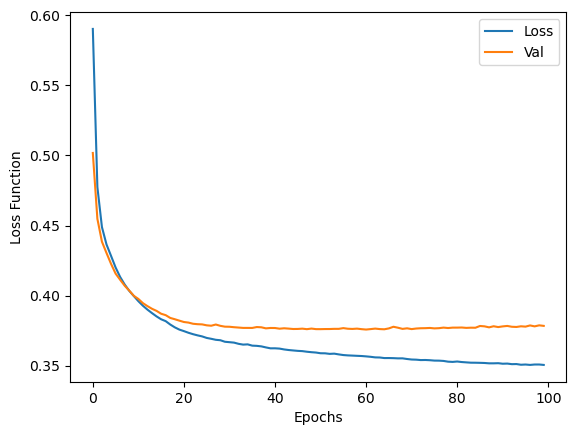

In [35]:
plt.plot(history.history["loss"], label ="Loss")
plt.plot(history.history["val_loss"], label = "Val")
plt.xlabel("Epochs")
plt.ylabel("Loss Function")
plt.legend()
plt.show() #Comparar batch size 

In [36]:
np.save("batch_size64_loss_function",np.array(history.history["loss"]))
np.save("batch_size64_val_function",np.array(history.history["val_loss"]))

In [15]:
# 6. Detect Anomalies
reconstructed_flux = autoencoder.predict(flux_normalized)
mse = np.mean(np.power(flux_normalized - reconstructed_flux, 2), axis=1)

#mse: Calculates the Mean Squared Error (MSE) between the original and reconstructed data for each observation.
#High MSE indicates a poor reconstruction, which could signal an anomaly.

# Set a threshold for anomaly detection (e.g., 95th percentile)
threshold = np.percentile(mse, 99)
anomalies = mse > threshold

#np.percentile(mse, 95): Determines the MSE value at the 95th percentile. 
#Observations with MSE above this threshold are considered anomalies.
#anomalies = mse > threshold: A boolean array where True indicates an anomaly.

209/209 [==============================] - 1s 3ms/step


In [16]:
# #anomalous_data_indices

# d = {"Flux": list(reconstructed_flux)}
# data = pd.DataFrame(data=d)
# #np.savetxt("reconstructed_flux", reconstructed_flux)

# #np.savetxt('reconstructed_flux.txt', reconstructed_flux)   # X is an array

# # df_anomalous = pd.read_pickle("default_anomalous.pkl")
# # df_anomalous

In [17]:
#data.to_pickle("reconstructed_fluxes.pkl")

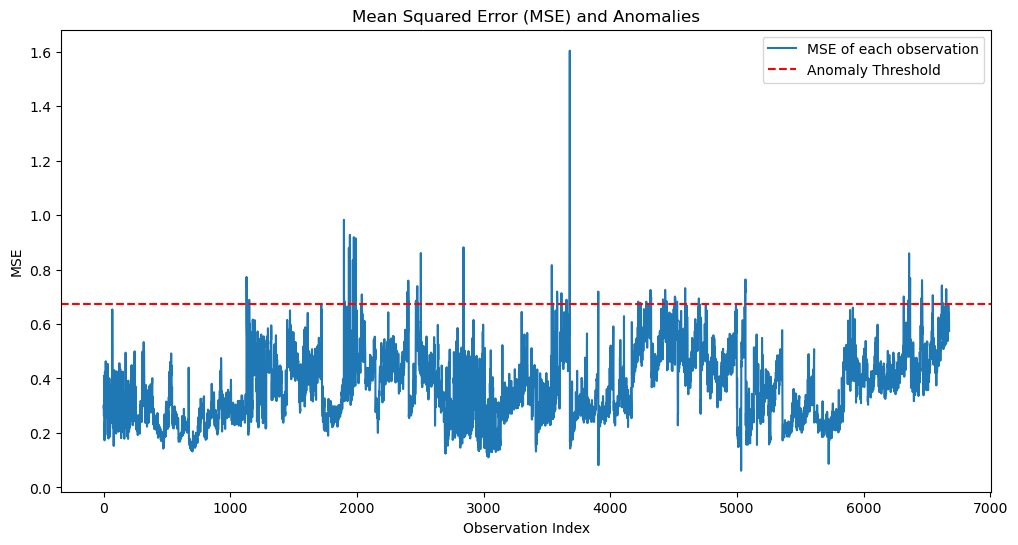

Anomalous Data Indices: [1128 1149 1897 1905 1936 1944 1967 1975 1990 2038 2398 2400 2402 2404
 2405 2406 2408 2465 2475 2476 2482 2504 2841 3538 3580 3581 3614 3654
 3678 3679 3680 3905 4221 4238 4284 4317 4318 4320 4322 4416 4433 4434
 4435 4445 4510 4512 4527 4591 4699 5064 5065 5066 5067 6317 6353 6359
 6367 6458 6460 6461 6462 6546 6617 6618 6626 6650 6652]


In [18]:
# 7. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(mse, label='MSE of each observation')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.title('Mean Squared Error (MSE) and Anomalies')
plt.xlabel('Observation Index')
plt.ylabel('MSE')
plt.legend()
plt.show()

# 8. Analyze Anomalies
anomalous_data_indices = np.where(anomalies)[0]
print(f"Anomalous Data Indices: {anomalous_data_indices}")


In [19]:
len(anomalous_data_indices)

67

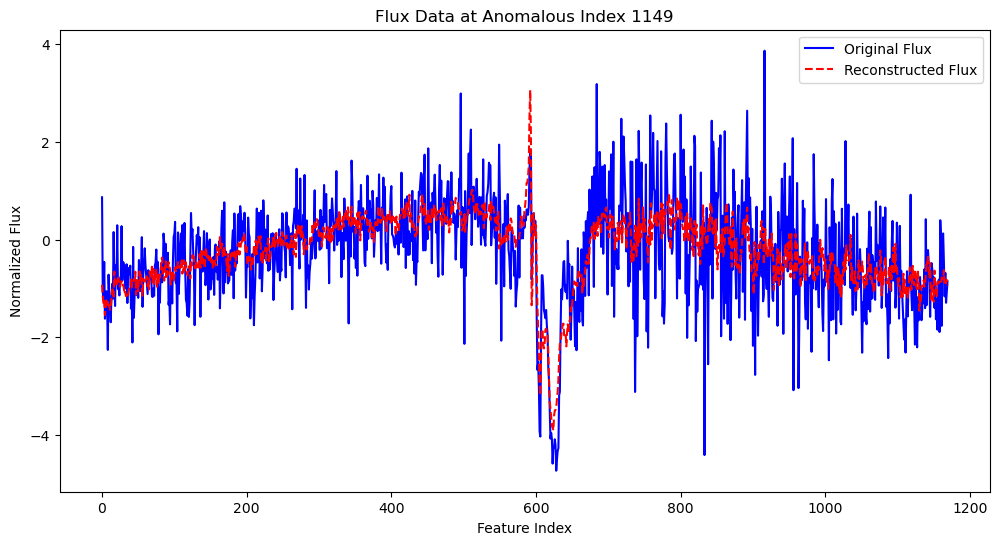

In [20]:
import matplotlib.pyplot as plt

# Index of the first anomaly
anomalous_index = anomalous_data_indices[1]

# Extract the original and reconstructed flux for the anomalous index
original_flux = flux_normalized[anomalous_index]
reconstructed_flux_at_index = reconstructed_flux[anomalous_index]

# Plot the original and reconstructed flux
plt.figure(figsize=(12, 6))
plt.plot(original_flux, label='Original Flux', color='blue')
plt.plot(reconstructed_flux_at_index, label='Reconstructed Flux', color='red', linestyle='--')
plt.title(f'Flux Data at Anomalous Index {anomalous_index}')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

In [21]:
########################################################

In [22]:
# 